<a href="https://colab.research.google.com/github/nhula01/polymath/blob/main/Module_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Root Finding**

We can see some motivations from the quadratic formulas. However, it is not always easy to find the roots of higher order polynomials or other functions by hands. Therefore, a numerical method is super useful.

19.1. Root Finding Problem Statement.

We can use the method fsolve from scipy to solve for roots ($x_r$) where $f(x_r)=0$

r = [0.45018361]
result= [-5.55111512e-17]
r = [-4.41758526e+49]
result= [5.12424775e-100]
The number of calls to function has reached maxfev = 400.


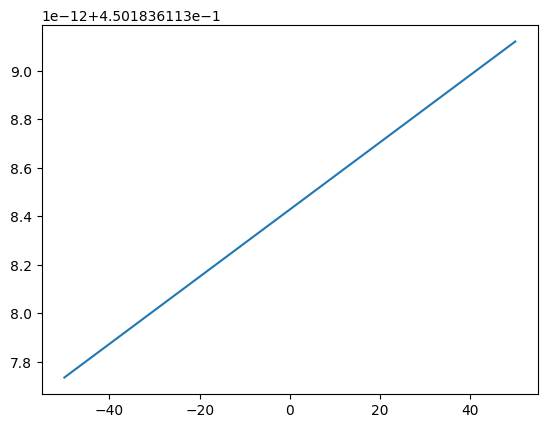

In [15]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

f = lambda x: .5*np.cos(x) - x
r = optimize.fsolve(f, -2)
print("r =", r)
# Verify the solution is a root
result = f(r)
print("result=", result)

#depending on initial guess, the answers for the roots might converge differently
x0 = np.linspace(-50,50,2)
r0 = optimize.fsolve(f, x0)
plt.plot(x0,r0)

#the above answer has only one root
#what about the case when there is no roots
f = lambda x: 1/x**2
r, infodict, ier, mesg = optimize.fsolve(f, -10, full_output=True)
print("r =", r)
result = f(r)
print("result=", result)
#some functtions might converge when we increase maxfev. However, there is no solution in our case
print(mesg)

19.2 Tolerance

In any computational computations, error is inevitable due to round off and float numbers. Nevertheless, we also want to have a threshold for this error range so we call it tolerance. We call that a computation has converged to a solution if the solution stays in the range of tolerance.

There are many ways to calculate error. We can choose each way depening on the situation

In [16]:
# let's say that define the tolarance to be .01
tolerance = .01
# and we defind error to be e = |x_{i+1}-x_i|
# then
x_new = 1.0001
x_old = 1.0000
error = x_new - x_old
if (tolerance>=error): # if the error likes within the tolarance range
  print("An acceptable answer")

An acceptable answer


19.3 Bisectional Method

From calculus, we have learned about the Intermediate Value Theorem. It states that if sign(f(a)) is different than sign(f(c)), then we have at least an f(b)=0 where a<b<c.

The bisectional method utilizes this method to find root by replacing the new comparision at m=(a+c)/2

In [23]:
import numpy as np

#we first define a general function for bisection method
#we apply recursive method in this problem
steps = 0
def my_bisection(f, a, b, tol):
    # approximates a root, R, of f bounded
    # by a and b to within tolerance
    # | f(m) | < tol with m the midpoint
    # between a and b Recursive implementation
    # check if a and b bound a root
    global steps
    steps+=1
    local_step=0
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")
    # get midpoint
    m = (a + b)/2
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        local_step = steps
        steps=0
        return m, local_step
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a.
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b.
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

# third order polynomial
f = lambda x: x**3+5*x**2-4

#find the three roots with different tolerance rate
r1,total_step_1 = my_bisection(f, -6, -4, 0.1)
print("first root =", r1, "where the function is called ",total_step_1,"times")
r2,total_step_2 = my_bisection(f, -4, 0, 0.01)
print("second root =", r2,"where the function is called ", total_step_2,"times")
r3,total_step_3 = my_bisection(f, 0, 4, 0.05)
print("third root =", r3, "where the function is called ", total_step_3,"times")
print("The values at those postitions are")
print("f(r1) =", f(r1))
print("f(r2) =", f(r2))
print("f(r3) =", f(r3))

first root = -4.828125 where the function is called  7 times
second root = -1.0 where the function is called  2 times
third root = 0.828125 where the function is called  8 times
The values at those postitions are
f(r1) = 0.006542205810546875
f(r2) = 0.0
f(r3) = -0.003124237060546875


In [24]:
# if we find at a bad bisection, an error will raise
my_bisection(f, 4,8, 0.05)

Exception: The scalars a and b do not bound a root

19.4 Newton-Raphson Method.

Another method to find roots is using Newton-Raphson method. We repeatedly guess where the solution is by approximating the next guess using linear approximation $f(x)\approx f(x_0) +f'(x_0)(x_1-x_0)$ so that we can calculate our next guess to be $x_1=x_0-\frac{f(x_0)}{f'(x_0)}$

In [29]:
import numpy as np
#define the method
def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f
    # using the Newton Raphson method
    # recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

f_prime=lambda x: 3*x**2+10*x
estimate = my_newton(f,f_prime, -6, .01)
print("estimate1=",estimate)
estimate2 = my_newton(f,f_prime, -1, .01)
print("estimate2=",estimate2)
estimate3 = my_newton(f,f_prime, 3, .01)
print("estimate3=",estimate3)
#they give similar answers as the bisection method

estimate1= -4.828427347702739
estimate2= -1
estimate3= 0.8284302192216397


19.5. Root Finding in Python

We can use a method embedded in the scipy library

In [30]:
from scipy.optimize import fsolve

f = lambda x: x**3+5*x**2-4
fsolve(f, [-6,-1, 3]) # we again obtain the same result like the last one

array([-4.82842712, -1.        ,  0.82842712])